<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
#notice: Disable all warnings 
import warnings
warnings.filterwarnings('ignore')

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [3]:
# !wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
url = 'datasets/loan_train.csv'

### Load Data From CSV File


In [4]:
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
df.shape

(346, 10)

### Convert to date time object


In [6]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      346 non-null    int64         
 1   Unnamed: 0.1    346 non-null    int64         
 2   loan_status     346 non-null    object        
 3   Principal       346 non-null    int64         
 4   terms           346 non-null    int64         
 5   effective_date  346 non-null    datetime64[ns]
 6   due_date        346 non-null    datetime64[ns]
 7   age             346 non-null    int64         
 8   education       346 non-null    object        
 9   Gender          346 non-null    object        
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 27.2+ KB


In [8]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [9]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [10]:
# notice: installing seaborn might takes a few minutes
# !pip install seaborn

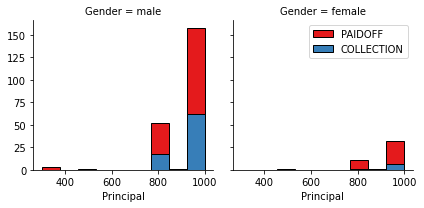

In [11]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

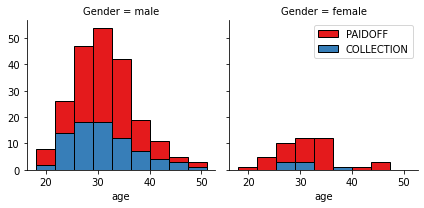

In [12]:
# Create bins
bins = np.linspace(df.age.min(), df.age.max(), 10)

# The basic workflow is:
# Initialize the FacetGrid object with the dataset and the variables that are used to structure the grid
# FacetGrid: maps dataset onto multiple axes arrayed in a grid of rows&columns that correspond to levels of variables in the dataset
# can represent levels of a third variable with 'hue'
# col: variable values to use for each axes/plot in columns (e.g., 'Gender' has 2 values M/F -> 2 columns of axes)
# col_wrap: # of columns to wrap the col variables around (if col_wrap=1, will span by 1 column -> 2x1 layout instead)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)

# Then one or more plotting functions can be applied to each subset by calling FacetGrid.map() or FacetGrid.map_dataframe()
# ec="k" -> edgecolor="black"
g.map(plt.hist, 'age', bins=bins, ec="k")

# Finally, the plot can be tweaked with other methods
g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


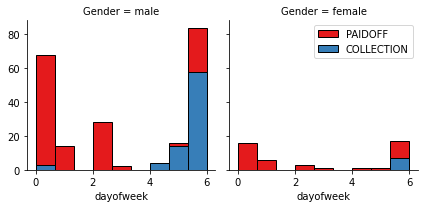

In [13]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [14]:
df['dayofweek'].value_counts()

6    166
0     87
2     31
5     31
1     20
4      8
3      3
Name: dayofweek, dtype: int64

We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [15]:
# if dayofweek is >4, consider it weekend
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


### Explore loan status by: Principal amount, Terms

In [16]:
df['Principal'].value_counts(normalize=True)

1000    0.745665
800     0.234104
300     0.008671
900     0.005780
500     0.005780
Name: Principal, dtype: float64

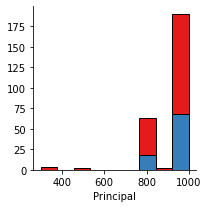

In [17]:
bins = np.linspace(df['Principal'].min(), df['Principal'].max(), 10)
g = sns.FacetGrid(df, hue='loan_status', palette='Set1')
g.map(plt.hist, 'Principal', bins=bins, ec="k")
plt.show()

In [18]:
df['terms'].value_counts(normalize=True)

30    0.531792
15    0.427746
7     0.040462
Name: terms, dtype: float64

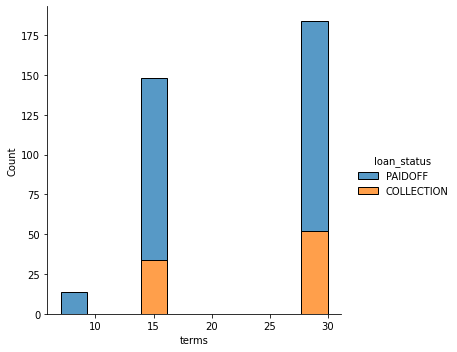

In [19]:
sns.displot(df, x='terms', hue='loan_status', multiple='stack')

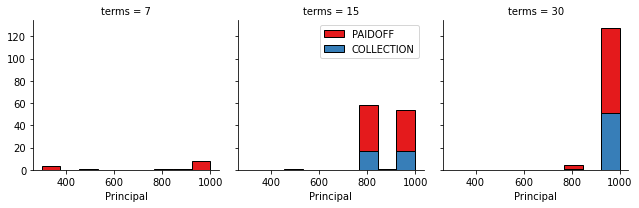

In [20]:
bins = np.linspace(df['Principal'].min(), df['Principal'].max(), 10)
g = sns.FacetGrid(df, col='terms', hue='loan_status', palette='Set1', col_wrap=3)
g.map(plt.hist, 'Principal', bins=bins, ec="k")
g.axes[1].legend()
plt.show()

## Convert Categorical features to numerical values


Let's look at gender:


In [21]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay their loans while only 73 % of males pay their loan

Let's convert male to 0 and female to 1:


In [22]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [23]:
df.tail()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
341,394,394,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,0,6,1
342,395,395,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,0,6,1
343,397,397,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,0,0,0
344,398,398,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,0,0,0
345,399,399,COLLECTION,1000,30,2016-09-12,2016-10-11,26,college,0,0,0


Divide Principal into 2: 1000 and less than 1000.

In [24]:
df['Principal_less_1000'] = np.where(df['Principal'] < 1000, 1, 0)
df.tail()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,Principal_less_1000
341,394,394,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,0,6,1,1
342,395,395,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,0,6,1,0
343,397,397,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,0,0,0,1
344,398,398,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,0,0,0,0
345,399,399,COLLECTION,1000,30,2016-09-12,2016-10-11,26,college,0,0,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           346 non-null    int64         
 1   Unnamed: 0.1         346 non-null    int64         
 2   loan_status          346 non-null    object        
 3   Principal            346 non-null    int64         
 4   terms                346 non-null    int64         
 5   effective_date       346 non-null    datetime64[ns]
 6   due_date             346 non-null    datetime64[ns]
 7   age                  346 non-null    int64         
 8   education            346 non-null    object        
 9   Gender               346 non-null    int64         
 10  dayofweek            346 non-null    int64         
 11  weekend              346 non-null    int64         
 12  Principal_less_1000  346 non-null    int32         
dtypes: datetime64[ns](2), int32(1), int

## One Hot Encoding

#### How about education?


In [26]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [27]:
df[['Principal_less_1000','terms','age','Gender','education']].head()

,Principal_less_1000,terms,age,Gender,education
0,0,30,45,0,High School or Below
1,0,30,33,1,Bechalor
2,0,15,27,0,college
3,0,30,28,1,college
4,0,30,29,0,college


#### Use one hot encoding technique to convert categorical variables to binary variables and append them to the feature Data Frame


In [28]:
Feature = df[['Principal_less_1000','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1, inplace=True)
Feature.head()

,Principal_less_1000,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,0,30,45,0,0,0,1,0
1,0,30,33,1,0,1,0,0
2,0,15,27,0,0,0,0,1
3,0,30,28,1,1,0,0,1
4,0,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [29]:
X = Feature
X[0:5]

,Principal_less_1000,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,0,30,45,0,0,0,1,0
1,0,30,33,1,0,1,0,0
2,0,15,27,0,0,0,0,1
3,0,30,28,1,1,0,0,1
4,0,30,29,0,1,0,0,1


In [30]:
pd.DataFrame(X).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Principal_less_1000   346 non-null    int32
 1   terms                 346 non-null    int64
 2   age                   346 non-null    int64
 3   Gender                346 non-null    int64
 4   weekend               346 non-null    int64
 5   Bechalor              346 non-null    uint8
 6   High School or Below  346 non-null    uint8
 7   college               346 non-null    uint8
dtypes: int32(1), int64(4), uint8(3)
memory usage: 13.3 KB


In [31]:
# X but not normalized
X_nn = Feature
X_nn.head()

,Principal_less_1000,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,0,30,45,0,0,0,1,0
1,0,30,33,1,0,1,0,0
2,0,15,27,0,0,0,0,1
3,0,30,28,1,1,0,0,1
4,0,30,29,0,1,0,0,1


In [32]:
X_nn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Principal_less_1000   346 non-null    int32
 1   terms                 346 non-null    int64
 2   age                   346 non-null    int64
 3   Gender                346 non-null    int64
 4   weekend               346 non-null    int64
 5   Bechalor              346 non-null    uint8
 6   High School or Below  346 non-null    uint8
 7   college               346 non-null    uint8
dtypes: int32(1), int64(4), uint8(3)
memory usage: 13.3 KB


What are our lables?


In [33]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [34]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.58402506,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [-0.58402506,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [-0.58402506, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [-0.58402506,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [-0.58402506,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


## Train/Test Split

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train set: ", X_train.shape, X_test.shape)
print("Test set: ", y_train.shape, y_test.shape)

Train set:  (276, 8) (70, 8)
Test set:  (276,) (70,)


In [36]:
# for non-normalized features set
X_nn_train, X_nn_test, y_train, y_test = train_test_split(X_nn, y, test_size=0.2, random_state=42)
print("Train set: ", X_nn_train.shape, X_nn_test.shape)
print("Test set: ", y_train.shape, y_test.shape)

Train set:  (276, 8) (70, 8)
Test set:  (276,) (70,)


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [37]:
# Import
from sklearn.neighbors import KNeighborsClassifier

In [38]:
# Define k
k = 3

# Train
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

# Predict
yhat_knn = knn.predict(X_test)

In [39]:
# Evaluate
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# Jaccard score
print("Train set accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set accuracy: ", metrics.accuracy_score(y_test, yhat_knn))

# Classification report (f1-score)
print(classification_report(y_test, yhat_knn))

Train set accuracy:  0.8333333333333334
Test set accuracy:  0.7285714285714285
              precision    recall  f1-score   support

  COLLECTION       0.31      0.29      0.30        14
     PAIDOFF       0.82      0.84      0.83        56

    accuracy                           0.73        70
   macro avg       0.57      0.56      0.56        70
weighted avg       0.72      0.73      0.72        70



In [40]:
# Find the best k by trying different k values
Ks = 10
# Create empty arrays with length of Ks (don't test k=0 so shape = Ks - 1)
mean_acc = np.zeros(Ks-1)
std_acc = np.zeros(Ks-1)

for n in range(1, Ks):
    # Train and Predict
    knn = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = knn.predict(X_test)
    # Evaluate and record results in arrays
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    # Calculate std dev of accuracy
    std_acc[n-1] = np.std(yhat==y_test) / np.sqrt(yhat.shape[0])
    
print(mean_acc)

[0.65714286 0.6        0.72857143 0.64285714 0.8        0.67142857
 0.77142857 0.64285714 0.74285714]


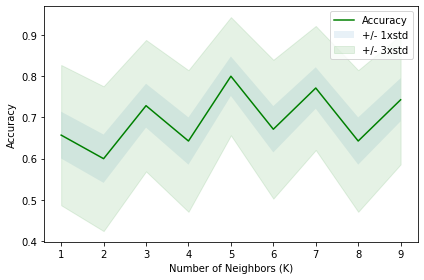

The best accuracy was 0.8 with k = 5


In [41]:
# Plot
plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1, Ks), mean_acc - 1*std_acc, mean_acc + 1*std_acc, alpha=0.1)
plt.fill_between(range(1, Ks), mean_acc - 3*std_acc, mean_acc + 3*std_acc, alpha=0.1, color='green')
plt.legend(('Accuracy', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was", mean_acc.max(), "with k =", mean_acc.argmax()+1)

In [42]:
# k = 1

k = 1
knn1 = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
yhat_knn1 = knn1.predict(X_test)

print("K = 1")
# Jaccard score
print("Train set accuracy: ", metrics.accuracy_score(y_train, knn1.predict(X_train)))
print("Test set accuracy: ", metrics.accuracy_score(y_test, yhat_knn1))

# Classification report (f1-score)
print(classification_report(y_test, yhat_knn1))

K = 1
Train set accuracy:  0.8695652173913043
Test set accuracy:  0.6571428571428571
              precision    recall  f1-score   support

  COLLECTION       0.25      0.36      0.29        14
     PAIDOFF       0.82      0.73      0.77        56

    accuracy                           0.66        70
   macro avg       0.53      0.54      0.53        70
weighted avg       0.71      0.66      0.68        70



In [43]:
# k = 5

k = 5
knn5 = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
yhat_knn5 = knn5.predict(X_test)

print("K = 5")
# Jaccard score
print("Train set accuracy: ", metrics.accuracy_score(y_train, knn5.predict(X_train)))
print("Test set accuracy: ", metrics.accuracy_score(y_test, yhat_knn5))

# Classification report (f1-score)
print(classification_report(y_test, yhat_knn5))

K = 5
Train set accuracy:  0.7934782608695652
Test set accuracy:  0.8
              precision    recall  f1-score   support

  COLLECTION       0.50      0.29      0.36        14
     PAIDOFF       0.84      0.93      0.88        56

    accuracy                           0.80        70
   macro avg       0.67      0.61      0.62        70
weighted avg       0.77      0.80      0.78        70



### KNN best results
k=5
* Train set accuracy:  0.7934782608695652
* Test set accuracy:  0.8
* Weighted avg f1: 0.78

To-do:
* Data cleaning
* Revisit variables: should we one hot encode more? what else can we do?

# Decision Tree


In [44]:
# Import
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [45]:
# 1st attempt
# Create instance
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Train
dtree.fit(X_train, y_train)

yhat_dtree = dtree.predict(X_test)

Decision Tree's accuracy:  0.7


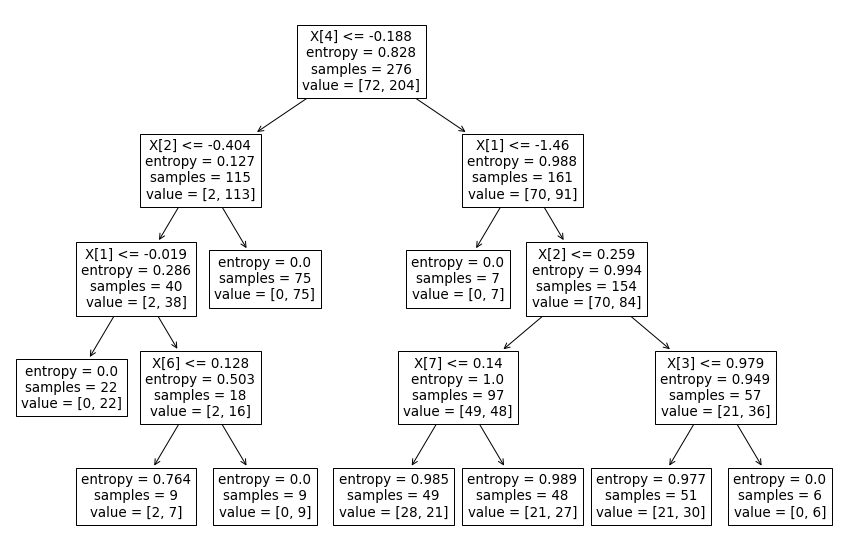

In [46]:
# Evaluate
from sklearn import metrics

print("Decision Tree's accuracy: ", metrics.accuracy_score(y_test, yhat_dtree))

# Visualize tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtree)
plt.show()

In [47]:
Feature.head()

,Principal_less_1000,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,0,30,45,0,0,0,1,0
1,0,30,33,1,0,1,0,0
2,0,15,27,0,0,0,0,1
3,0,30,28,1,1,0,0,1
4,0,30,29,0,1,0,0,1


In [48]:
X[0:5]

array([[-0.58402506,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [-0.58402506,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [-0.58402506, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [-0.58402506,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [-0.58402506,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

Decision Tree first attempt accuracy (critertion= entropy, max_depth= 4): 0.7

In [49]:
# Try with non-normalized features
# Create instance
dtree_nn = DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Train
dtree_nn.fit(X_nn_train, y_train)

yhat_dtree_nn = dtree_nn.predict(X_nn_test)

print("Non-normalized Decision Tree accuracy: ", metrics.accuracy_score(y_test, yhat_dtree_nn))

Non-normalized Decision Tree accuracy:  0.7


In [50]:
# Try with non-normalized features and different params
mindepth_test = 2
maxdepth_test = 9
# Create empty arrays with length of maxdepth_test
mean_acc = np.zeros(maxdepth_test-mindepth_test)
std_acc = np.zeros(maxdepth_test-mindepth_test)

for n in range(mindepth_test, maxdepth_test):
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=n)
    # Train
    dtree.fit(X_nn_train, y_train)
    # Predict
    yhat_dtree = dtree.predict(X_nn_test)
    # Fill values of np arrays mean and std dev accuracy
    mean_acc[n-2] = metrics.accuracy_score(y_test, yhat_dtree)
    std_acc[n-2] = np.std(yhat==y_test) / np.sqrt(yhat.shape[0])


The best accuracy was 0.8, with max_depth = 2


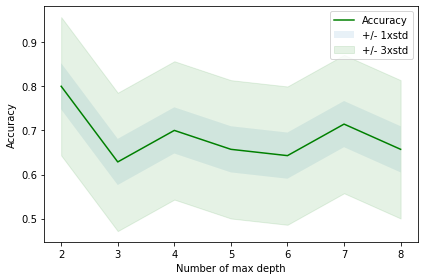

In [51]:
# Plot
plt.plot(range(mindepth_test, maxdepth_test), mean_acc, 'g')
plt.fill_between(range(mindepth_test, maxdepth_test), mean_acc-1*std_acc, mean_acc+1*std_acc, alpha=0.1)
plt.fill_between(range(mindepth_test, maxdepth_test), mean_acc-3*std_acc, mean_acc+3*std_acc, alpha=0.1, color='green')
plt.legend(('Accuracy', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of max depth')
plt.tight_layout()

print(f"The best accuracy was {mean_acc.max()}, with max_depth = {mean_acc.argmax()+2}")

In [140]:
dtree_best = DecisionTreeClassifier(criterion='entropy', max_depth=7)
dtree_best.fit(X_train, y_train)
yhat_dtree_best = dtree_best.predict(X_test)

print("Accuracy score: ", metrics.accuracy_score(y_test, yhat_dtree_best))
print("Classification report:\n", classification_report(y_test, yhat_dtree_best))
print("F1 score: ", metrics.f1_score(y_test, yhat_dtree_best, average='weighted'))

Accuracy score:  0.7285714285714285
Classification report:
               precision    recall  f1-score   support

  COLLECTION       0.37      0.50      0.42        14
     PAIDOFF       0.86      0.79      0.82        56

    accuracy                           0.73        70
   macro avg       0.62      0.64      0.62        70
weighted avg       0.76      0.73      0.74        70

F1 score:  0.7427924100821297


#### Best Decision Tree params:

criterion='entropy', max_depth=7 -> gives more well-rounded results and higher F1 score

# Support Vector Machine


In [52]:
from sklearn import svm

# Initialize with desired kernel function
svm_model = svm.SVC(kernel='rbf')

# Train model
svm_model.fit(X_train, y_train)

# Predict
yhat_svm = svm_model.predict(X_test)

In [53]:
# Evaluate
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

print("First attempt")
print("Jaccard index for COLLECTION: ", jaccard_score(y_test, yhat_svm, pos_label='COLLECTION'))
print("Jaccard index for PAIDOFF: ", jaccard_score(y_test, yhat_svm, pos_label='PAIDOFF'))
print("")
print("F1-score: ", f1_score(y_test, yhat_svm, average='weighted'))
print("Accuracy score: ", metrics.accuracy_score(y_test, yhat_svm))

First attempt
Jaccard index for COLLECTION:  0.08333333333333333
Jaccard index for PAIDOFF:  0.6764705882352942

F1-score:  0.6763832658569502
Accuracy score:  0.6857142857142857


In [54]:
# Test different kernel functions
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
jac_scores = np.zeros(len(kernels))
f1_scores = np.zeros(len(kernels))

for n in range(len(kernels)):
    sv_m = svm.SVC(kernel=kernels[n])
    sv_m.fit(X_train, y_train)
    yhat = sv_m.predict(X_test)
    jac_scores[n] = metrics.accuracy_score(y_test, yhat)
    f1_scores[n] = f1_score(y_test, yhat, average='weighted')

print(f"The best SVM model by jaccard score is {kernels[jac_scores.argmax()]}, with accuracy:  {jac_scores.max()}")
print(f"The best SVM model by f1 score is {kernels[f1_scores.argmax()]}, with accuracy:  {f1_scores.max()}")

The best SVM model by jaccard score is sigmoid, with accuracy:  0.7285714285714285
The best SVM model by f1 score is sigmoid, with accuracy:  0.6913165266106444


In [55]:
svm_best = svm.SVC(kernel='sigmoid')
svm_best.fit(X_train, y_train)
yhat_svm = svm_best.predict(X_test)

print("Best attempt:")
print("Overall Jaccard score: ", metrics.accuracy_score(y_test, yhat_svm))
print("Jaccard score for COLLECTION: ", jaccard_score(y_test, yhat_svm, pos_label="COLLECTION"))
print("Jaccard score for PAIDOFF: ", jaccard_score(y_test, yhat_svm, pos_label="PAIDOFF"))
print("F1 score: ", f1_score(y_test, yhat_svm, average='weighted'))
print(classification_report(y_test, yhat_svm))

Best attempt:
Overall Jaccard score:  0.7285714285714285
Jaccard score for COLLECTION:  0.05
Jaccard score for PAIDOFF:  0.7246376811594203
F1 score:  0.6913165266106444
              precision    recall  f1-score   support

  COLLECTION       0.14      0.07      0.10        14
     PAIDOFF       0.79      0.89      0.84        56

    accuracy                           0.73        70
   macro avg       0.47      0.48      0.47        70
weighted avg       0.66      0.73      0.69        70



#### SVM Notes:
* Performs much better when classifying PAIDOFF, but not COLLECTION

# Logistic Regression


In [56]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(X_train, y_train)

yhat_LR = LR.predict(X_test)
print(yhat_LR[0:5])
yhat_prob = LR.predict_proba(X_test)
print(yhat_prob[0:5])

['PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF']
[[0.4887985  0.5112015 ]
 [0.30558303 0.69441697]
 [0.50901805 0.49098195]
 [0.26449591 0.73550409]
 [0.459053   0.540947  ]]


In [57]:
# Jaccard
print("Jaccard score for COLLECTION: ", jaccard_score(y_test, yhat_LR, pos_label="COLLECTION"))
print("Jaccard score for PAIDOFF: ", jaccard_score(y_test, yhat_LR, pos_label="PAIDOFF"))
print("F1 score")
print(classification_report(y_test, yhat_LR))

# Log loss
from sklearn.metrics import log_loss
print("Log Loss: ", log_loss(y_test, yhat_prob))

Jaccard score for PAIDOFF:  0.6865671641791045
Jaccard score for COLLECTION:  0.125
F1 score
              precision    recall  f1-score   support

  COLLECTION       0.23      0.21      0.22        14
     PAIDOFF       0.81      0.82      0.81        56

    accuracy                           0.70        70
   macro avg       0.52      0.52      0.52        70
weighted avg       0.69      0.70      0.70        70

Log Loss:  0.577841923679114


Initial Test:
* Jaccard score for PAIDOFF/COLLECTION: 0.125/0.687
* F1 Score Weighted Avg: 0.7
* Log loss: 0.578

Test different solvers and regularization values:
* Solvers: 'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs'

In [143]:
LR_best = LogisticRegression(C=1, solver='newton-cg').fit(X_train, y_train)

yhat_LR1 = LR_best.predict(X_test)
yhat_LR1_prob = LR_best.predict_proba(X_test)

# Jaccard
print("Jaccard score for COLLECTION: ", jaccard_score(y_test, yhat_LR1, pos_label="COLLECTION"))
print("Jaccard score for PAIDOFF: ", jaccard_score(y_test, yhat_LR1, pos_label="PAIDOFF"))
print("F1 score")
print(classification_report(y_test, yhat_LR1))

# Log loss
from sklearn.metrics import log_loss
print("Log Loss: ", log_loss(y_test, yhat_LR1_prob))

Jaccard score for COLLECTION:  0.125
Jaccard score for PAIDOFF:  0.6865671641791045
F1 score
              precision    recall  f1-score   support

  COLLECTION       0.23      0.21      0.22        14
     PAIDOFF       0.81      0.82      0.81        56

    accuracy                           0.70        70
   macro avg       0.52      0.52      0.52        70
weighted avg       0.69      0.70      0.70        70

Log Loss:  0.5163233748108027


#### Best Logistic Regression params:

C=1, solver='newton-cg'

# Model Evaluation using Test set


In [103]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [ ]:
#!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

### Load Test set for evaluation


In [104]:
test_df = pd.read_csv('datasets/loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


Preprocessing to-dos:
* dayofweek
* weekend
* Principal < 1000
* Gender
* View value counts of education
* One hot encode education

In [107]:
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3) else 0)
test_df['Principal_less_1000'] = np.where(test_df['Principal'] < 1000, 1, 0)
test_df['Gender'] = test_df['Gender'].replace(to_replace=['male', 'female'], value=[1,0])

In [114]:
test_df.groupby('education')['loan_status'].value_counts()

education             loan_status
Bechalor              PAIDOFF         8
High School or Below  PAIDOFF        11
                      COLLECTION     10
Master or Above       PAIDOFF         2
college               PAIDOFF        19
                      COLLECTION      4
Name: loan_status, dtype: int64

In [116]:
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,Principal_less_1000
0,1,1,PAIDOFF,1000,30,2016-09-08,10/7/2016,50,Bechalor,0,3,0,0
1,5,5,PAIDOFF,300,7,2016-09-09,9/15/2016,35,Master or Above,1,4,1,1
2,21,21,PAIDOFF,1000,30,2016-09-10,10/9/2016,43,High School or Below,0,5,1,0
3,24,24,PAIDOFF,1000,30,2016-09-10,10/9/2016,26,college,1,5,1,0
4,35,35,PAIDOFF,800,15,2016-09-11,9/25/2016,29,Bechalor,1,6,1,1


In [127]:
Feature_test = test_df[['Principal_less_1000', 'terms', 'age', 'Gender', 'weekend']]
Feature_test = pd.concat([Feature_test, pd.get_dummies(test_df['education'])], axis=1)
Feature_test.drop(['Master or Above'], axis=1, inplace=True)

In [128]:
Feature_test.head()

,Principal_less_1000,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,0,30,50,0,0,1,0,0
1,1,7,35,1,1,0,0,0
2,0,30,43,0,1,0,1,0
3,0,30,26,1,1,0,0,1
4,1,15,29,1,1,1,0,0


In [129]:
X_test_f = Feature_test

In [130]:
# Normalize
X_test_f = preprocessing.StandardScaler().fit(X_test_f).transform(X_test_f.astype(float))
X_test_f[0:5]

array([[-0.62017367,  0.92844966,  3.05981865, -1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [ 1.61245155, -1.70427745,  0.53336288,  0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [-0.62017367,  0.92844966,  1.88080596, -1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [-0.62017367,  0.92844966, -0.98251057,  0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [ 1.61245155, -0.78854628, -0.47721942,  0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

In [123]:
y_test_f = test_df['loan_status'].values

Algorithms:
* KNN
* Decision Tree
* SVM
* Logistic Regression

In [132]:
# Best KNN: k=5
yhat_knn_f = knn5.predict(X_test_f)
print("Jaccard score: ", metrics.accuracy_score(y_test_f, yhat_knn_f))
print("Classification report:\n", classification_report(y_test_f, yhat_knn_f))
print("F1 Score: ", metrics.f1_score(y_test_f, yhat_knn_f, average='weighted'))

Jaccard score:  0.6666666666666666
Classification report:
               precision    recall  f1-score   support

  COLLECTION       0.30      0.21      0.25        14
     PAIDOFF       0.75      0.82      0.79        40

    accuracy                           0.67        54
   macro avg       0.53      0.52      0.52        54
weighted avg       0.63      0.67      0.65        54

F1 Score:  0.6468253968253967


In [141]:
# Best Decision Tree: criterion='entropy', max_depth=7
yhat_dtree_f = dtree_best.predict(X_test_f)
print("Jaccard score: ", metrics.accuracy_score(y_test_f, yhat_dtree_f))
print("Classification report:\n", classification_report(y_test_f, yhat_dtree_f))
print("F1 Score: ", metrics.f1_score(y_test_f, yhat_dtree_f, average='weighted'))

Jaccard score:  0.7037037037037037
Classification report:
               precision    recall  f1-score   support

  COLLECTION       0.44      0.57      0.50        14
     PAIDOFF       0.83      0.75      0.79        40

    accuracy                           0.70        54
   macro avg       0.64      0.66      0.64        54
weighted avg       0.73      0.70      0.71        54

F1 Score:  0.7144249512670564


In [142]:
# Best SVM: kernel='sigmoid'
yhat_svm_f = svm_best.predict(X_test_f)
print("Jaccard score: ", metrics.accuracy_score(y_test_f, yhat_svm_f))
print("Classification report:\n", classification_report(y_test_f, yhat_svm_f))
print("F1 Score: ", metrics.f1_score(y_test_f, yhat_svm_f, average='weighted'))

Jaccard score:  0.7592592592592593
Classification report:
               precision    recall  f1-score   support

  COLLECTION       0.57      0.29      0.38        14
     PAIDOFF       0.79      0.93      0.85        40

    accuracy                           0.76        54
   macro avg       0.68      0.61      0.62        54
weighted avg       0.73      0.76      0.73        54

F1 Score:  0.7288207747977863


In [146]:
# Best Logistic Regression: C=1, solver='newton-cg'
yhat_LR_f = LR_best.predict(X_test_f)
yhat_LR_f_prob = LR_best.predict_proba(X_test_f)
print("Jaccard score: ", metrics.accuracy_score(y_test_f, yhat_LR_f))
print("Classification report:\n", classification_report(y_test_f, yhat_LR_f))
print("F1 Score: ", metrics.f1_score(y_test_f, yhat_LR_f, average='weighted'))
print("Log loss: ", metrics.log_loss(y_test_f, yhat_LR_f_prob))

Jaccard score:  0.7407407407407407
Classification report:
               precision    recall  f1-score   support

  COLLECTION       0.50      0.29      0.36        14
     PAIDOFF       0.78      0.90      0.84        40

    accuracy                           0.74        54
   macro avg       0.64      0.59      0.60        54
weighted avg       0.71      0.74      0.71        54

F1 Score:  0.7144311330357843
Log loss:  0.4820631669318729


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.667       | 0.647        | NA      |
| Decision Tree      | 0.704       | 0.714        | NA      |
| SVM                | 0.759       | 0.729        | NA      |
| LogisticRegression | 0.741       | 0.714        | 0.482       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
